In [31]:
import sklearn as skl
print(skl.__version__)
import gzip
import cloudpickle as pickle
import os
import esaWells
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

0.19.1


In [32]:
def load_data(filename):
    with gzip.GzipFile(filename, 'rb') as f:
        return pickle.load(f)

Having loaded well logs compute features

In [33]:
data = load_data(os.path.join('..','SLCInput.esa'))

In [34]:
data.dfLogData=data.dfLogData[[u'idWlb', u'MD', u'DT', u'DEN', u'NEU', u'RDEP', u'GR', u'FM']]
data.dfLogData.dropna(inplace=True)
data.dfLogData.head()

,idWlb,MD,DT,DEN,NEU,RDEP,GR,FM
idData,,,,,,,,
1906909,82,1761.030762,105.125,2.2930,0.4233,3.7500,103.529999,82.0
1906910,82,1761.183228,109.375,2.2598,0.4292,3.5020,101.405701,82.0
1906911,82,1761.335571,108.375,2.3477,0.4561,3.3574,100.421402,82.0
1906912,82,1761.488037,109.000,2.3340,0.4648,3.4062,98.341301,82.0
1906913,82,1761.640381,104.375,2.3848,0.4458,3.3965,94.481300,82.0


In [41]:
X = data.dfLogData[[u'MD', u'DT', u'DEN', u'NEU', u'RDEP', u'GR', u'FM']]

subsample = data.dfLogData.copy()
subsample.drop(data.dfLogData.index, inplace=True)

for well in data.dfLogData.idWlb.drop_duplicates():
    thisWell = data.dfLogData.loc[data.dfLogData.idWlb == well]
    subsample = subsample.append(thisWell.iloc[np.random.randint(0,len(thisWell), 1000),:])

from sklearn.preprocessing import RobustScaler
X = RobustScaler().fit_transform(X)
Xsub = RobustScaler().fit_transform(subsample)

How many dimensations unique codes should be in out code book?

wWe can try and estimate that by running kmeans mulitple times on a subbset of our input and looking at the AIC metric

In [42]:
def power2range(n):
    return [1 << i for i in range(n)]

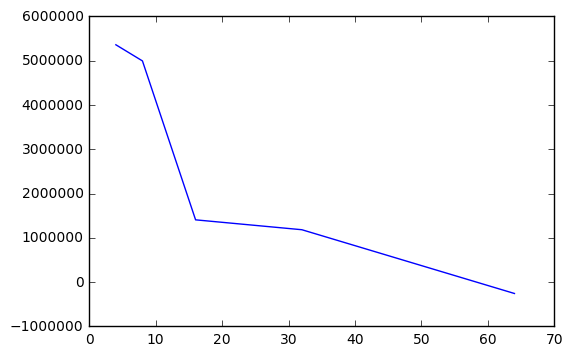

In [44]:
from sklearn.mixture import GaussianMixture

x = X
aic = []

kn = power2range(11)[2:]

for k in kn:
    model = GaussianMixture(n_components=k, init_params='kmeans')
    model.fit(x)
    aic.append(model.aic(x))
    
plt.plot(kn, aic)

Quantise the symbolic space into k code words

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K = 16

In [ ]:
quantiser = KMeans(n_clusters=K, random_state=0).fit(X)

In [ ]:
S = quantiser.predict(X)